In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from scipy.misc import imresize
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
import random
# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [49]:
image_size = 500  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.
image_size_resized = 160
exampleImage = np.ndarray(shape=(image_size,image_size,3),dtype=np.float32)

class BatchGenerator(object):
    folder = ""
    globalIndex = 0
    def __init__(self, folder):
          self.folder = folder
    def getCategory(self,imageName):
        animal = imageName.split(".")[0]
        if animal == "cat":
            return 0
        else:
            return 1
    def processImageWithPadding(self,image_data):
        image_data = (ndimage.imread(image_file).astype(float) - pixel_depth / 2) / pixel_depth
        fullResult_resized = []
        if(image_data.shape[0]*image_data.shape[1]>image_size*image_size):
            fullResule_resized = imresize(image_data, (image_size_resized,image_size_resized), interp='bilinear', mode=None)
        else:
            fullResult = np.full(exampleImage.shape,0, dtype=exampleImage.dtype)
            #padding image with 0s
            fullResult[:image_data.shape[0],:image_data.shape[1],:image_data.shape[2]] = image_data
            fullResult_resized = imresize(fullResult, (image_size_resized,image_size_resized), interp='bilinear', mode=None)
            # show image if want
            #plt.imshow(fullResule_resized)
        return fullResult_resized
    
    def processImageWithResizing(self,image_data):
        fullResult_resized = imresize(image_data, (image_size_resized,image_size_resized), interp='bilinear', mode=None)
        return fullResult_resized
    
    def testBatch(self,folder):
        image_files = os.listdir(folder)
        datasetInput = np.ndarray(shape=(len(image_files), image_size_resized, image_size_resized,3),
                                 dtype=np.uint8)
        imageCount = 0
        for image in image_files[:30]:
            image_file = os.path.join(folder, image)
            try:
                image_data = (ndimage.imread(image_file).astype(np.uint8))
                fullResule_resized = self.processImageWithResizing(image_data)
                datasetInput[imageCount] = fullResule_resized
            except IOError as e:
                  print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
            imageCount+=1
        return datasetInput  
    
    def nextBatch(self,shuffle=True,batchImageNumber=500):
          folder = self.folder

          train_images = [TRAIN_DIR+i for i in os.listdir(folder)] # use this for full dataset
          print(train_images[:10])
          train_dogs =   [TRAIN_DIR+i for i in os.listdir(folder) if 'dog' in i]
          train_cats =   [TRAIN_DIR+i for i in os.listdir(folder) if 'cat' in i]
            
          train_images = train_dogs[:batchImageNumber//2] + train_cats[:batchImageNumber//2]
          print("loading data...")
          """Load the data for a single letter label."""
          
          datasetInput = np.ndarray(shape=(batchImageNumber, image_size_resized, image_size_resized,3),
                                 dtype=np.uint8)
          y = []
          num_images = 0
          if shuffle == True:
                image_files = random.sample(train_images, len(train_images))
          
          print(image_files[:10])
                #random.shuffle(image_files[:2000])
          for i in range(0,batchImageNumber):

            image = image_files[i]
            image_file = os.path.join(folder, image)
            try:
              image_data = (ndimage.imread(image_file).astype(np.uint8))
              fullResule_resized = self.processImageWithResizing(image_data)
              datasetInput[i]=fullResule_resized
              y.append(self.getCategory(image))
            except IOError as e:
              print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
            imageCount += 1
          self.globalIndex += 1
          return datasetInput,y


batchGenerator = BatchGenerator("cat_dog_train")

In [50]:
train1,y1 = batchGenerator.nextBatch(batchImageNumber=1000)
print(train1.shape)
for i in range(10):
    print(y1[i])
    print(train1[0][0][0])
    plt.imshow(train1[i])
    plt.show()

['cat_dog_train/dog.5886.jpg', 'cat_dog_train/cat.8857.jpg', 'cat_dog_train/dog.601.jpg', 'cat_dog_train/dog.10194.jpg', 'cat_dog_train/dog.9178.jpg', 'cat_dog_train/cat.3247.jpg', 'cat_dog_train/dog.12189.jpg', 'cat_dog_train/dog.7089.jpg', 'cat_dog_train/dog.2126.jpg', 'cat_dog_train/dog.8994.jpg']
loading data...
['cat_dog_train/dog.5566.jpg', 'cat_dog_train/cat.12339.jpg', 'cat_dog_train/cat.7248.jpg', 'cat_dog_train/cat.10803.jpg', 'cat_dog_train/cat.4197.jpg', 'cat_dog_train/cat.9768.jpg', 'cat_dog_train/dog.1459.jpg', 'cat_dog_train/dog.2406.jpg', 'cat_dog_train/cat.5896.jpg', 'cat_dog_train/cat.1145.jpg']
Could not read: cat_dog_train/cat_dog_train/dog.5566.jpg : [Errno 2] No such file or directory: 'cat_dog_train/cat_dog_train/dog.5566.jpg' - it's ok, skipping.


UnboundLocalError: local variable 'imageCount' referenced before assignment

['cat_dog_train/dog.5886.jpg', 'cat_dog_train/cat.8857.jpg', 'cat_dog_train/dog.601.jpg', 'cat_dog_train/dog.10194.jpg', 'cat_dog_train/dog.9178.jpg', 'cat_dog_train/cat.3247.jpg', 'cat_dog_train/dog.12189.jpg', 'cat_dog_train/dog.7089.jpg', 'cat_dog_train/dog.2126.jpg', 'cat_dog_train/dog.8994.jpg']
Processed 0 of 1000
Processed 250 of 1000
Processed 500 of 1000
Processed 750 of 1000
Processed 0 of 25
Train shape: (1000, 160, 160, 3)
Test shape: (25, 160, 160, 3)
1
[120 113 103]


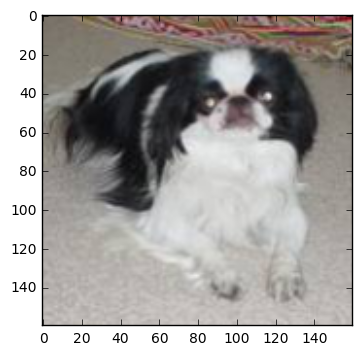

1
[120 113 103]


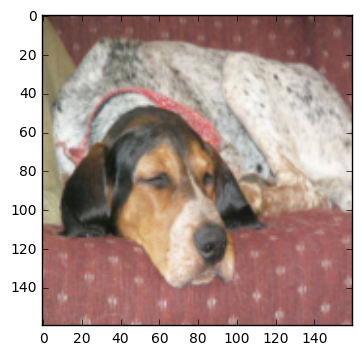

1
[120 113 103]


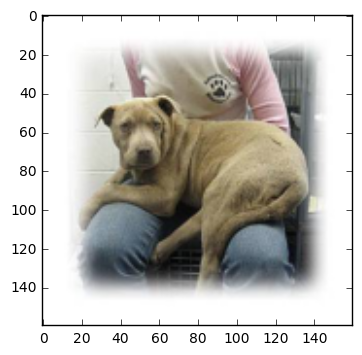

1
[120 113 103]


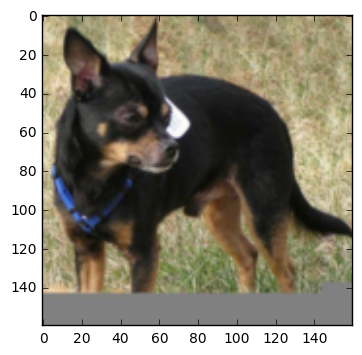

1
[120 113 103]


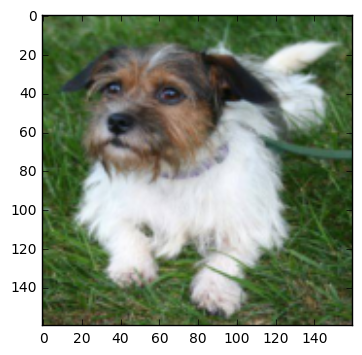

1
[120 113 103]


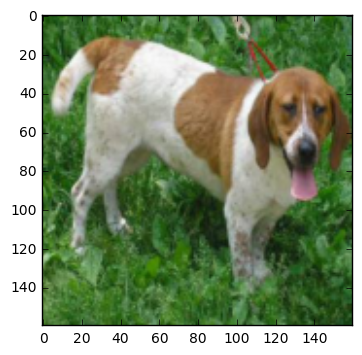

1
[120 113 103]


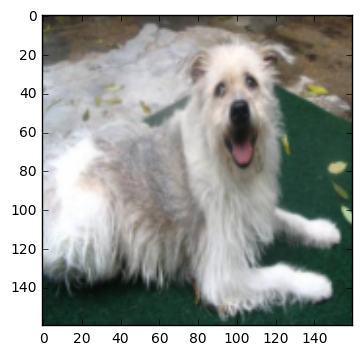

1
[120 113 103]


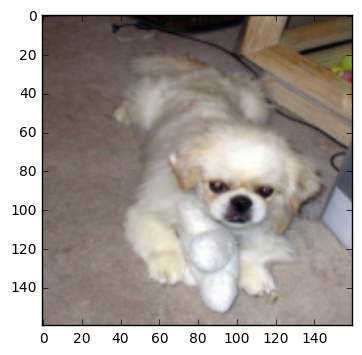

1
[120 113 103]


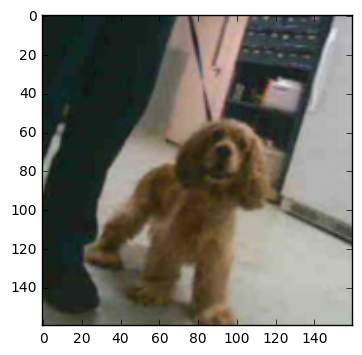

1
[120 113 103]


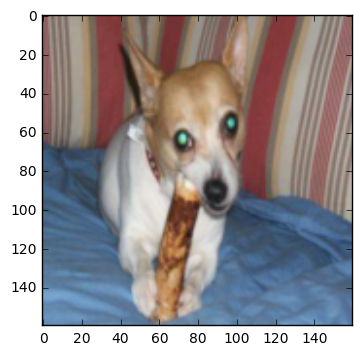

In [7]:
#import os, cv2, random
TRAIN_DIR = 'cat_dog_train/'
TEST_DIR = 'cat_dog_test/'

ROWS = 160
COLS = 160
CHANNELS = 3

train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] # use this for full dataset
print(train_images[:10])
train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]

test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]


# slice datasets for memory efficiency on Kaggle Kernels, delete if using full dataset
train_images = train_dogs[:500] + train_cats[:500]
#random.shuffle(train_images)
test_images =  test_images[:25]

def read_image(file_path):
    #img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    image_data = (ndimage.imread(file_path).astype(float) - 
                                pixel_depth / 2) / pixel_depth
    fullResule_resized = batchGenerator.processImageWithResizing(image_data)
    return fullResule_resized


def prep_data(images):
    count = len(images)
    data = np.ndarray((count, ROWS, COLS,CHANNELS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image
        if i%250 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

train = prep_data(train_images)
test = prep_data(test_images)

print("Train shape: {}".format(train.shape))
print("Test shape: {}".format(test.shape))

labels = []
for i in train_images:
    if 'dog' in i:
        labels.append(1)
    else:
        labels.append(0)

# sns.countplot(labels)
# sns.plt.title('Cats and Dogs')
for i in range(10):
    print(labels[i])
    print(train[0][0][0])
    plt.imshow(train[i])
    plt.show()

loading data...
['dog.5886.jpg', 'cat.8857.jpg', 'dog.601.jpg', 'dog.10194.jpg', 'dog.9178.jpg', 'cat.3247.jpg', 'dog.12189.jpg', 'dog.7089.jpg', 'dog.2126.jpg', 'dog.8994.jpg']
['dog.4694.jpg', 'cat.11472.jpg', 'dog.4943.jpg', 'dog.3044.jpg', 'dog.8826.jpg', 'cat.8289.jpg', 'dog.10818.jpg', 'dog.9666.jpg', 'cat.244.jpg', 'dog.4005.jpg']
(1000, 160, 160, 3)
1
[54 51 41]


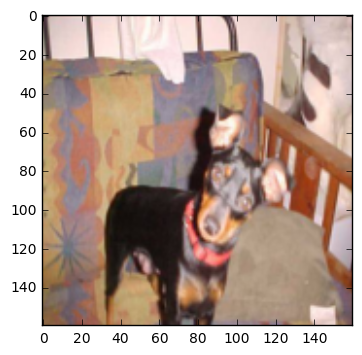

0
[54 51 41]


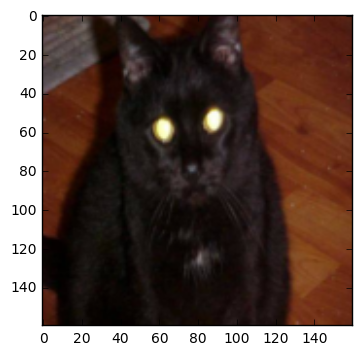

1
[54 51 41]


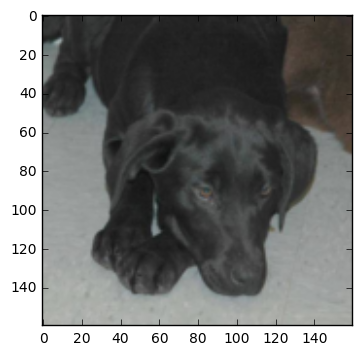

1
[54 51 41]


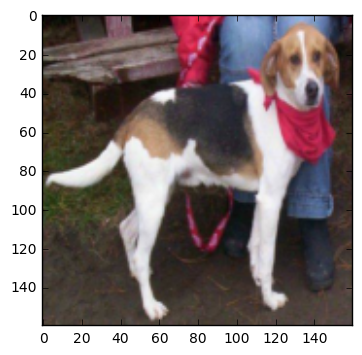

1
[54 51 41]


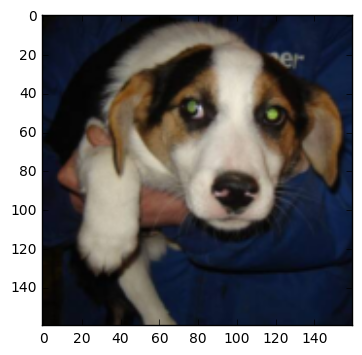

0
[54 51 41]


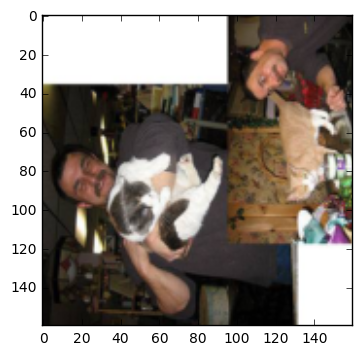

1
[54 51 41]


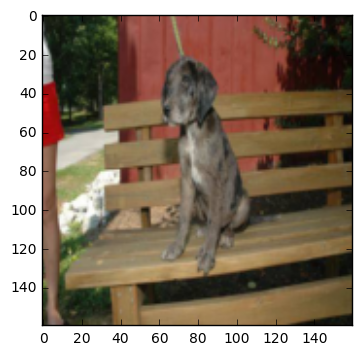

1
[54 51 41]


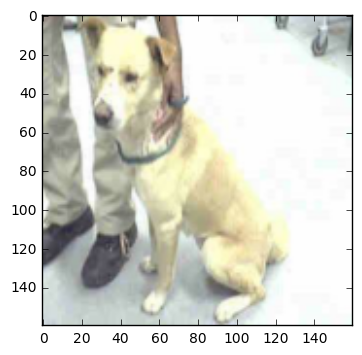

0
[54 51 41]


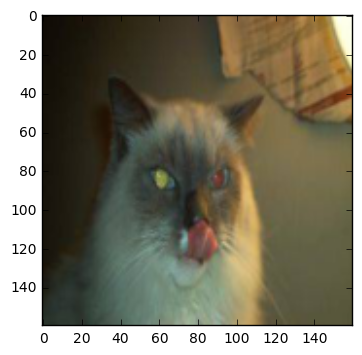

1
[54 51 41]


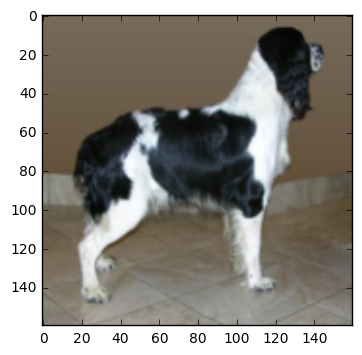

In [35]:

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop

from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping


depth = 32
num_hidden = 300
num_hidden2 = 400

num_channels = 3
patch_size = 3

## Callback for loss logging per epoch
class LossHistory(Callback):
#     losses = []
#     val_losses = []
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
    
    def on_epoch_end(self, batch, logs={}):
       
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto') 


model = Sequential()
model.add(Convolution2D(depth, patch_size, patch_size, border_mode='same',subsample=(1,1) ,input_shape=(image_size_resized, image_size_resized, num_channels)))
model.add(Activation('relu')) 
model.add(Convolution2D(depth, patch_size, patch_size, border_mode='same'))#16x14x14x16
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, patch_size, patch_size, border_mode='same'))#16x14x14x16
model.add(Activation('relu'))
model.add(Convolution2D(64, patch_size, patch_size, border_mode='same'))#16x14x14x16
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(128, patch_size, patch_size, border_mode='same'))#16x14x14x16
model.add(Activation('relu'))
model.add(Convolution2D(128, patch_size, patch_size, border_mode='same'))#16x14x14x16
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(256, patch_size, patch_size, border_mode='same'))#16x14x14x16
model.add(Activation('relu'))
model.add(Convolution2D(256, patch_size, patch_size, border_mode='same'))#16x14x14x16
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())#16x(7x7x16)
model.add(Dense(num_hidden))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_hidden))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
optimizer="adam",metrics=["accuracy"])

history = LossHistory()
nb_epoch = 5

train1,y1 = batchGenerator.nextBatch(batchImageNumber=1000)
print(train1.shape)
for i in range(10):
    print(y1[i])
    print(train1[0][0][0])
    plt.imshow(train1[i])
    plt.show()


#model.fit(train, labels, batch_size=16, nb_epoch=nb_epoch,
#              validation_split=0.25, verbose=1, shuffle=True, callbacks=[history, early_stopping])

# for i in range(nb_epoch):
#     print(i," :batch")
#     train_dataset, train_labels = batchGenerator.nextBatch(batchImageNumber=500)
#     model.fit(train_dataset, train_labels, validation_split=0.10,shuffle=True,nb_epoch=1,verbose=1,callbacks=[history, early_stopping])




In [36]:

#model.fit(train, labels, batch_size=16, nb_epoch=nb_epoch,
#              validation_split=0.25, verbose=1, shuffle=True, callbacks=[history, early_stopping])

print("===> my model")
model.fit(train1, y1, batch_size=16, nb_epoch=nb_epoch,
              validation_split=0.25, verbose=1, shuffle=True, callbacks=[history, early_stopping])
#model.fit(train1, y1, validation_split=0.10,shuffle=True,nb_epoch=10,verbose=1,callbacks=[history, early_stopping])


===> my model
Train on 750 samples, validate on 250 samples
Epoch 1/5
750/750 [==============================] - 3s - loss: 0.6960 - acc: 0.5053 - val_loss: 0.6944 - val_acc: 0.4880
Epoch 2/5
750/750 [==============================] - 3s - loss: 0.6933 - acc: 0.5173 - val_loss: 0.6937 - val_acc: 0.4880
Epoch 3/5
750/750 [==============================] - 3s - loss: 0.6928 - acc: 0.5173 - val_loss: 0.6942 - val_acc: 0.4880
Epoch 4/5
750/750 [==============================] - 3s - loss: 0.6929 - acc: 0.5173 - val_loss: 0.6944 - val_acc: 0.4880
Epoch 5/5
750/750 [==============================] - 3s - loss: 0.6926 - acc: 0.5173 - val_loss: 0.6951 - val_acc: 0.4880


In [24]:
loss = history.losses
val_loss = history.val_losses
print(loss)

[0.014607674166601442, 1.192093321833454e-07, 1.192093321833454e-07, 1.192093321833454e-07, 1.192093321833454e-07]


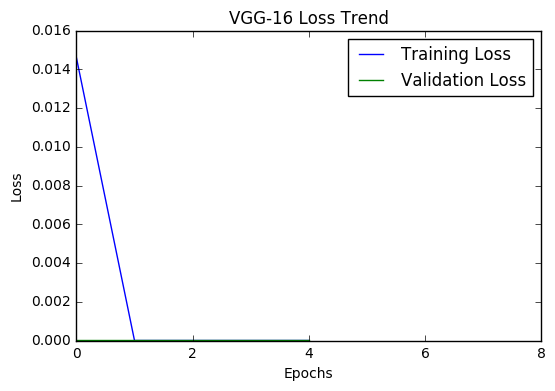

In [25]:

loss = history.losses
val_loss = history.val_losses



plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG-16 Loss Trend')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,nb_epoch)[0::2])
plt.legend()
plt.show()

In [26]:

testBatch = batchGenerator.testBatch(folder="cat_dog_test")
proba = model.predict(testBatch,verbose=0)




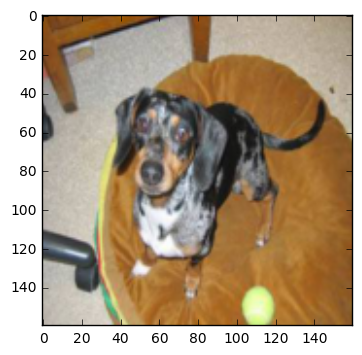

I am 100.00% sure this is a Dog


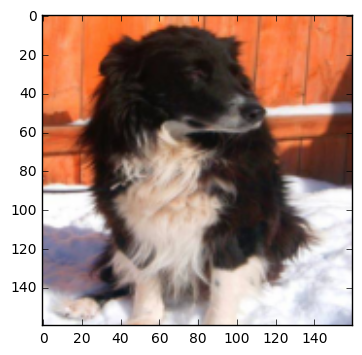

I am 100.00% sure this is a Dog


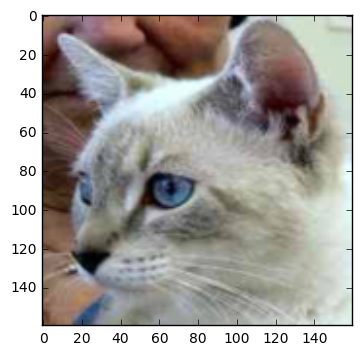

I am 100.00% sure this is a Dog


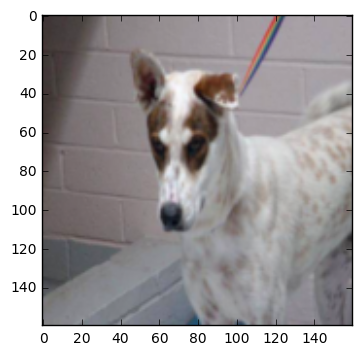

I am 100.00% sure this is a Dog


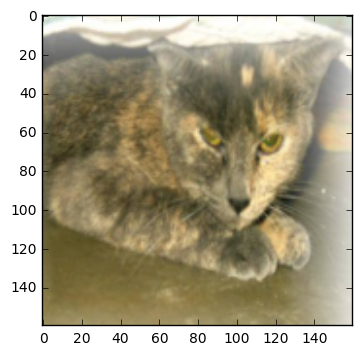

I am 100.00% sure this is a Dog


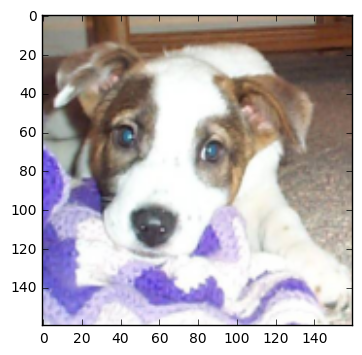

I am 100.00% sure this is a Dog


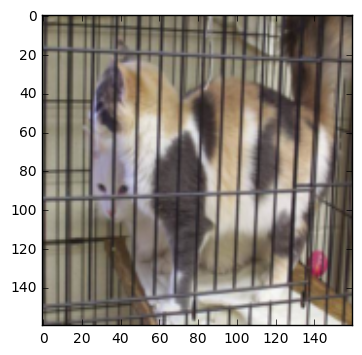

I am 100.00% sure this is a Dog


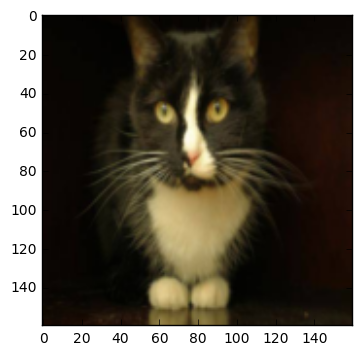

I am 100.00% sure this is a Dog


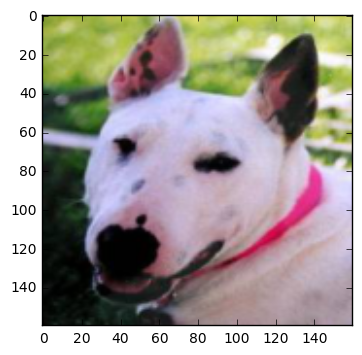

I am 100.00% sure this is a Dog


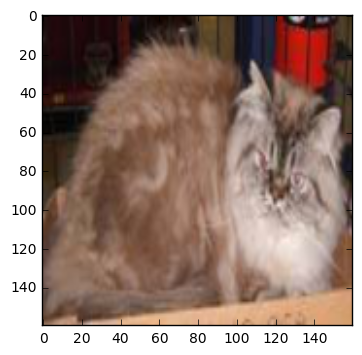

I am 100.00% sure this is a Dog


In [27]:
for i in range(0,10):
    plt.imshow(testBatch[i])
    plt.show()
    if proba[i, 0] >= 0.5: 
        print('I am {:.2%} sure this is a Dog'.format(proba[i][0]))
    else: 
        print('I am {:.2%} sure this is a Cat'.format(1-proba[i][0]))

In [188]:
print(proba)

[[ 1.]
 [ 1.]
 [ 1.]
 ..., 
 [ 1.]
 [ 1.]
 [ 1.]]
